In [806]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [807]:
train_labeled = pd.read_csv('data/labled_train_data.csv', index_col=0, sep='\t', comment='#')
comments_labeled = pd.read_csv('data/labled_train_comments.csv', index_col=0, sep='\t', comment='#')
tracks_labeled = pd.read_csv('data/labled_train_tracks.csv', index_col=0, sep='\t', comment='#')

train_unlabeled = pd.read_csv('data/unlabled_train_data.csv', index_col=0, sep='\t', comment='#')
comments_unlabeled = pd.read_csv('data/unlabled_train_comments.csv', index_col=0, sep='\t', comment='#')
tracks_unlabeled = pd.read_csv('data/unlabled_train_tracks.csv', index_col=0, sep='\t', comment='#')

In [808]:
train_labeled.shape, train_unlabeled.shape

((9000, 19), (10722, 18))

In [809]:
X = train_labeled.iloc[:, :-1]
y = train_labeled.iloc[:, -1:]

In [810]:
X['client_rate_ride'] = X['client_rate_ride'].fillna(X['client_rate_ride'].mean())
X['client_rides_cnt'] = X['client_rides_cnt'].fillna(X['client_rides_cnt'].mean())
X['driver_rides_cnt'] = X['driver_rides_cnt'].fillna(X['driver_rides_cnt'].mean())

In [811]:
X

,order_id,driver_id,client_id,dttm,date,arrived_distance,arrived_duration,distance,duration,from_latitude,from_longitude,to_latitude,to_longitude,mark,client_rate_ride,client_rides_cnt,driver_rides_cnt,comment
0,6a0f322ade1a05e5c4cec4344efbce8b,f7c2b293ef94420f5e51abae6889b83b,3156d05c6458a8228bed59f02075a61e,2021-01-22 21:53:00,2021-01-22,150.0,1.0,11.8,20.5,55.795900,37.560300,55.716502,37.524627,Kia K5,4.877908,16.0,39.0,Больше нечего сказать
1,934ecbe5845426fd3f8ef7938cce2a11,01d029c42c99581080a60679fca06ff9,3156d05c6458a8228bed59f02075a61e,2021-01-24 14:09:00,2021-01-24,570.0,1.0,17.2,26.2,55.716502,37.524627,55.808253,37.638847,Volkswagen Polo,4.877908,18.0,338.0,Да
2,5348cb339b63eaea3b2cb57a064ce550,3c88deb7df7a73a24ebc229db9783405,3156d05c6458a8228bed59f02075a61e,2021-01-26 21:02:00,2021-01-26,40.0,0.0,5.8,10.9,55.716637,37.524223,55.741958,37.568172,MercedesBenz EClass,4.877908,17.0,162.0,Больше нечего сказать
3,309ef91c3b51e27d097642169576f67b,f35a8ff85f2095755f16bba91035fbdc,3156d05c6458a8228bed59f02075a61e,2021-01-27 17:24:00,2021-01-27,140.0,1.0,4.5,10.7,55.689076,37.491088,55.716502,37.524627,Kia Optima,4.877908,18.0,136.0,Больше нечего сказать
4,3506e04e45d39c6e3033637389da1041,0a227ac8d702170c03acf36d55e60d0d,3156d05c6458a8228bed59f02075a61e,2021-01-29 15:31:00,2021-01-29,150.0,1.0,15.4,25.1,55.655489,37.616629,55.716502,37.524627,Kia Rio,5.000000,20.0,194.0,Больше нечего сказать
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,bd1c7382bcfa4f5981a8b98d50cdbf37,f60352f28fc0b03c54e1e389519945eb,183c8d2838e8800609793f5925479f8c,2021-04-03 14:17:21,2021-04-03,0.0,0.0,20.5,42.6,55.711662,37.758961,55.748140,37.538721,Kia Optima,5.000000,14.0,79.0,Больше нечего сказать
8996,37a2c7ddf4e0e911d1f5b827a22424c6,52c7c1b99bf9eec8c36a3a852f4208a6,a3555aa482365082065ddbe2b60b7944,2021-04-03 14:17:44,2021-04-03,10.0,0.0,12.1,26.2,55.739415,37.649726,55.816200,37.631172,Lada Vesta,4.877908,38.0,383.0,На заднем сиденье жёлтые полосы и пятна остали...
8997,675f5308235dfb532bc12c628568a431,36a26e1bdad8ffa82020449e4c670f0d,e5070710fc47d467ebc6488eeceed19a,2021-04-03 14:24:30,2021-04-03,60.0,0.0,3.9,11.4,55.739262,37.633640,55.747094,37.605861,Kia Ceed,4.877908,14.0,38.0,Больше нечего сказать
8998,209184a3e7d4cff49703e03ea9329ce7,68a076cc5bb1e50a25086baa275af6a0,35fae1e96d973ac127e8bfa7859f1964,2021-04-03 14:30:45,2021-04-03,2650.0,6.0,2.0,6.0,55.783070,37.578504,55.795784,37.584560,Kia Rio,4.877908,32.0,121.0,Больше нечего сказать


# Analysis

In [812]:
dataset_joined = X.join(y)

In [813]:
dataset_joined[dataset_joined.columns[3: ]]

,dttm,date,arrived_distance,arrived_duration,distance,duration,from_latitude,from_longitude,to_latitude,to_longitude,mark,client_rate_ride,client_rides_cnt,driver_rides_cnt,comment,is_aggressive
0,2021-01-22 21:53:00,2021-01-22,150.0,1.0,11.8,20.5,55.795900,37.560300,55.716502,37.524627,Kia K5,4.877908,16.0,39.0,Больше нечего сказать,0
1,2021-01-24 14:09:00,2021-01-24,570.0,1.0,17.2,26.2,55.716502,37.524627,55.808253,37.638847,Volkswagen Polo,4.877908,18.0,338.0,Да,0
2,2021-01-26 21:02:00,2021-01-26,40.0,0.0,5.8,10.9,55.716637,37.524223,55.741958,37.568172,MercedesBenz EClass,4.877908,17.0,162.0,Больше нечего сказать,0
3,2021-01-27 17:24:00,2021-01-27,140.0,1.0,4.5,10.7,55.689076,37.491088,55.716502,37.524627,Kia Optima,4.877908,18.0,136.0,Больше нечего сказать,0
4,2021-01-29 15:31:00,2021-01-29,150.0,1.0,15.4,25.1,55.655489,37.616629,55.716502,37.524627,Kia Rio,5.000000,20.0,194.0,Больше нечего сказать,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2021-04-03 14:17:21,2021-04-03,0.0,0.0,20.5,42.6,55.711662,37.758961,55.748140,37.538721,Kia Optima,5.000000,14.0,79.0,Больше нечего сказать,0
8996,2021-04-03 14:17:44,2021-04-03,10.0,0.0,12.1,26.2,55.739415,37.649726,55.816200,37.631172,Lada Vesta,4.877908,38.0,383.0,На заднем сиденье жёлтые полосы и пятна остали...,0
8997,2021-04-03 14:24:30,2021-04-03,60.0,0.0,3.9,11.4,55.739262,37.633640,55.747094,37.605861,Kia Ceed,4.877908,14.0,38.0,Больше нечего сказать,0
8998,2021-04-03 14:30:45,2021-04-03,2650.0,6.0,2.0,6.0,55.783070,37.578504,55.795784,37.584560,Kia Rio,4.877908,32.0,121.0,Больше нечего сказать,0


### Comments

Как много комментариев было оставлено в случае агрессивной поездки?

In [814]:
print("{}%".format((1 - sum(dataset_joined[dataset_joined.is_aggressive == True].comment == 'Больше нечего сказать') / \
len(dataset_joined[dataset_joined.is_aggressive == True])) * 100))

43.28703703703704%


А в случае неагрессивной?

In [815]:
print("{}%".format((1 - sum(dataset_joined[dataset_joined.is_aggressive == False].comment == 'Больше нечего сказать') / \
len(dataset_joined[dataset_joined.is_aggressive == False])) * 100))

13.935574229691872%


In [816]:
comment_phrases = list(dataset_joined.comment.value_counts().index[: 10])

In [817]:
comment_phrases

['Больше нечего сказать',
 'Да',
 'Все хорошо',
 'Все ок',
 'Нет',
 'Отличный водитель',
 'Отличный водитель!',
 'Хороший водитель',
 'Все отлично',
 'Ок']

In [818]:
dataset_joined['is_comment'] = (~np.isin(dataset_joined.comment, comment_phrases)).astype(int)

Как много агрессивных поездок среди содержащих комментарий?

In [819]:
print("{}%".format(sum(dataset_joined[(dataset_joined.is_comment == True)].is_aggressive == True) \
                   / len(dataset_joined[(dataset_joined.is_comment == True)]) * 100))

17.13747645951036%


In [820]:
(dataset_joined[(dataset_joined.is_comment == 1) & (dataset_joined.is_aggressive == 1)].comment).iloc[8]

'Очень вежливый'

In [821]:
def count_words(x):
    return len(x.split(" "))

dataset_joined["count_words"] = dataset_joined[(dataset_joined.is_comment == True)].comment.apply(lambda x: count_words(x))

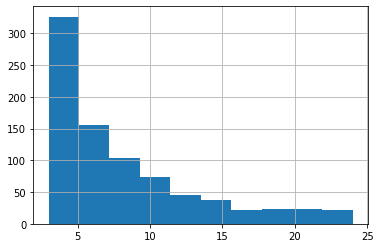

In [822]:
dataset_joined[(dataset_joined["count_words"] > 2) & (dataset_joined["count_words"] < 25)].count_words.hist()

#### Anxious words

In [823]:
aggressive_comments = dataset_joined[(dataset_joined['is_comment'] == True) & (dataset_joined.is_aggressive == True)].comment.values
normal_comments = dataset_joined[(dataset_joined['is_comment'] == True) & (dataset_joined.is_aggressive == False)].comment.values

In [824]:
expection_words = ['на', 'по', 'с', 'в', 'что', 'и', 'а']

In [825]:
from collections import Counter

counter = {}

for sentence in normal_comments:
    for word in sentence.split(" "):
        word = word.lower().replace(',', '').replace('.', '')
        if (word in expection_words): continue
        if (word in counter.keys()):
            counter[word][0] += 1
        else: counter[word] = [1, 0]

for sentence in aggressive_comments:
    for word in sentence.split(" "):
        word = word.lower().replace(',', '').replace('.', '')
        if (word in expection_words): continue
        if (word in counter.keys()):
            counter[word][1] += 1
        else: counter[word] = [0, 1]


In [826]:
count_all_words = np.array(list(map(lambda x: np.array(x), np.array(list(counter.items())).T[1]))).T

count_normal_words = count_all_words[0].sum()
count_aggressive_words = count_all_words[1].sum()

for word_pair in list(counter.items()):
    if (word_pair[1][1] == 0 and word_pair[1][0] > 0):
        counter[word_pair[0]].append("normal")
        continue

    if (word_pair[1][0] == 0 and word_pair[1][1] > 0):
        counter[word_pair[0]].append("aggressive")
        continue

    ratio_aggressive = word_pair[1][1] / count_aggressive_words
    ratio_normal = word_pair[1][0] / count_normal_words

    if (ratio_aggressive / ratio_normal >= 3):
        counter[word_pair[0]].append("aggressive")
        continue

    if (ratio_normal / ratio_aggressive >= 3):
        counter[word_pair[0]].append("normal")
        continue

    counter[word_pair[0]].append("neutral")
            

In [827]:
def check_sentence(sentence, words_type):
    words_count = 0
    for word in sentence.split(" "):
        word = word.lower().replace(',', '').replace('.', '')
        
        if (word not in list(counter.keys()) or len(counter[word]) == 2): continue
        
        if (words_type == counter[word][2]): 
            words_count += 1
    return words_count

In [828]:
dataset_joined[dataset_joined.is_comment == True].comment.apply(lambda x: check_sentence(x, "aggressive")).value_counts()

0     699
1     144
2      73
3      31
4      29
5      19
7      14
8      10
6       7
15      7
9       5
14      4
10      3
12      2
16      2
18      2
34      1
25      1
32      1
28      1
26      1
13      1
21      1
19      1
17      1
11      1
46      1
Name: comment, dtype: int64

In [829]:
dataset_joined[dataset_joined.is_comment == True].comment.apply(lambda x: check_sentence(x, "normal")).value_counts()

2     237
0     192
1     176
3     148
4      91
5      52
7      41
6      36
8      22
9      12
12      9
15      9
11      7
10      6
13      5
22      3
14      3
24      2
25      2
19      1
20      1
17      1
23      1
26      1
27      1
33      1
58      1
64      1
Name: comment, dtype: int64

In [830]:
dataset_joined['anxious_word'] = dataset_joined.comment.apply(lambda x: len(set(anxious_words) & set(x)) > 0)

Сколько среди всех поездок, в описании которых есть тревожные слова, агрессивных?

In [831]:
sum(dataset_joined[(dataset_joined.anxious_word == True)].is_aggressive == True) / len(dataset_joined[(dataset_joined.anxious_word == True)])

0.20318725099601595

In [832]:
sum(dataset_joined[(dataset_joined.is_comment == True)].comment.apply(lambda x: 'агрессивн' in x))

9

In [833]:
sum(dataset_joined[(dataset_joined.is_comment == True)].comment.apply(lambda x: 'укачало' in x))

6

In [834]:
sum(dataset_joined[(dataset_joined.is_comment == True)].comment.apply(lambda x: 'дтп' in x))

3

In [835]:
sum(dataset_joined[(dataset_joined.is_comment == True)].comment.apply(lambda x: 'опасн' in x))

26

### Numerical features

Средняя дальность поездки с агрессивным и обычным водителем

In [836]:
dataset_joined[dataset_joined.is_aggressive == True].distance.mean(), dataset_joined[dataset_joined.is_aggressive == False].distance.mean()

(13.435185185185187, 11.06733193277315)

Средняя продолжительность поездки с агрессивным и обычным водителем

In [837]:
dataset_joined[dataset_joined.is_aggressive == True].duration.mean(), dataset_joined[dataset_joined.is_aggressive == False].duration.mean()

(26.735648148148158, 22.129236694677886)

Мода марки машины агрессивного и обычного водителя(hyundai просто самая популярная, так что изменения не налицо)

In [838]:
dataset_joined[dataset_joined.is_aggressive == True].mark.value_counts().index[0], dataset_joined[dataset_joined.is_aggressive == False].mark.value_counts().index[0]

('Hyundai Solaris', 'Hyundai Solaris')

Все марки машин

In [839]:
dataset_joined[dataset_joined.is_aggressive == True].mark.value_counts(), dataset_joined[dataset_joined.is_aggressive == False].mark.value_counts()

(Hyundai Solaris         94
 Skoda Octavia           59
 Kia Rio                 58
 Kia Optima              43
 Volkswagen Polo         36
 Skoda Rapid             22
 Ford Focus              18
 Toyota Camry            18
 Kia Ceed                14
 Hyundai Elantra          9
 Hyundai Sonata           8
 Nissan Almera            6
 Kia K5                   6
 Lada Vesta               5
 Hyundai i40              4
 Volkswagen Jetta         4
 Renault Logan            3
 Ford Galaxy              3
 Chevrolet Cruze          2
 MercedesBenz EClass      2
 Kia Cerato               2
 Renault Scenic           1
 Lifan Solano 2           1
 Hyundai H1               1
 Daewoo Gentra            1
 Peugeot 408              1
 Ford Mondeo              1
 Renault Sandero          1
 Kia Ceed Sportswagon     1
 BMW 5er                  1
 BMW 5 серия              1
 LADA ВАЗ Vesta           1
 Lexus ES                 1
 Skoda Kodiaq             1
 RAVON R4                 1
 Mitsubishi Outlande

Средняя оценка поездки пассажиром(у агрессивных поездок оценка ниже, но не сильно => видимо, агрессивность оценивает не пассажир)

In [840]:
dataset_joined[dataset_joined.is_aggressive == True].client_rate_ride.mean(), dataset_joined[dataset_joined.is_aggressive == False].client_rate_ride.mean()

(4.735102079475958, 4.885108231270127)

Количество поездок пассажира с агрессивным/неагрессивным водителем(не должно влиять, ведь оценку агрессивности, по-видимому, выдает не пассажир)

In [841]:
dataset_joined[dataset_joined.is_aggressive == True].client_rides_cnt.mean(), dataset_joined[dataset_joined.is_aggressive == False].client_rides_cnt.mean()

(23.979166666666668, 25.881293133875513)

Среднее количество поездок агрессивного/неагрессивного водителя

In [842]:
dataset_joined[dataset_joined.is_aggressive == True].driver_rides_cnt.mean(), dataset_joined[dataset_joined.is_aggressive == False].driver_rides_cnt.mean()

(172.13848877799202, 177.31195338518717)

Средняя скорость

In [843]:
dataset_joined["speed"] = dataset_joined.distance / (dataset_joined.duration / 60)

In [844]:
speed_aggressive = dataset_joined[dataset_joined.is_aggressive == True].speed
speed_notaggressive = dataset_joined[dataset_joined.is_aggressive == False].speed

In [845]:
speed_aggressive.mean(), speed_notaggressive.mean()

(29.249228289049686, 28.63926292440239)

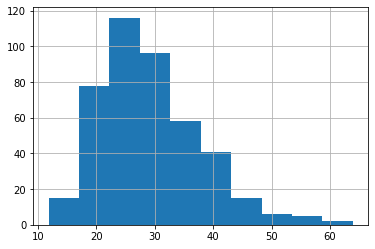

In [846]:
speed_aggressive.hist()

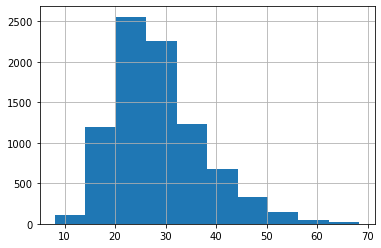

In [847]:
speed_notaggressive.hist()

## Time

In [848]:
dataset_joined['dttm'] = pd.to_datetime(dataset_joined.dttm)

### Hour

In [849]:
dataset_joined['hour'] = dataset_joined.dttm.apply(lambda x: x.hour)

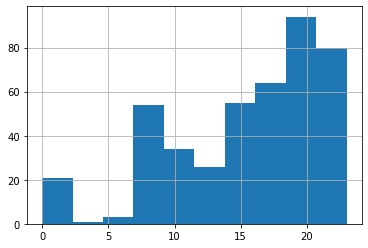

In [850]:
dataset_joined[dataset_joined.is_aggressive == True].hour.hist()

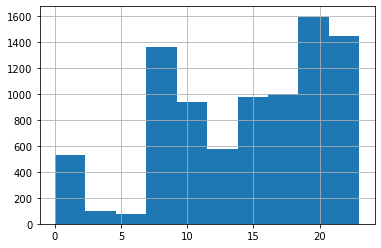

In [851]:
dataset_joined[dataset_joined.is_aggressive == False].hour.hist()

In [852]:
condition = ((dataset_joined.hour > 6) & (dataset_joined.hour < 10)) | ((dataset_joined.hour > 17) & (dataset_joined.hour < 23))

In [853]:
dataset_traffjam = dataset_joined[condition]

In [854]:
dataset_notraffjam = dataset_joined[~condition]

In [855]:
(dataset_traffjam.is_aggressive == True).sum() / len(dataset_traffjam), (dataset_joined.is_aggressive == True).sum() / len(dataset_traffjam)

(0.0499378367177787, 0.08951512639867384)

In [856]:
(dataset_notraffjam.is_aggressive == True).sum() / len(dataset_notraffjam), (dataset_joined.is_aggressive == True).sum() / len(dataset_traffjam)

(0.045759463344513654, 0.08951512639867384)

### Month

In [857]:
dataset_joined['month'] = dataset_joined.dttm.apply(lambda x: x.month)

In [858]:
dataset_joined.month.value_counts()

3    4663
2    2597
1    1263
4     477
Name: month, dtype: int64

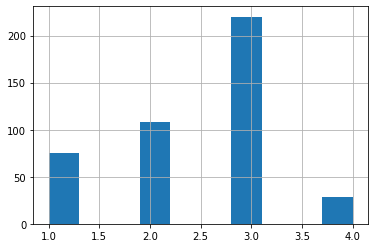

In [859]:
dataset_joined[(dataset_joined.is_aggressive == True)].month.hist()

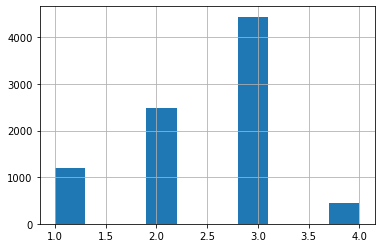

In [860]:
dataset_joined[(dataset_joined.is_aggressive == False)].month.hist()

### Weekday

In [861]:
dataset_joined.dttm.iloc[0].weekday()

4

In [862]:
dataset_joined['weekday'] = dataset_joined.dttm.apply(lambda x: x.weekday())

In [863]:
dataset_joined['holiday'] = (dataset_joined.weekday >= 5).astype(int)

In [864]:
dataset_joined[(dataset_joined.holiday == 1)].is_aggressive.sum() / len(dataset_joined[(dataset_joined.holiday == 1)])

0.04805683242791475

In [865]:
(dataset_joined[(dataset_joined.holiday != 1)].is_aggressive.astype(bool)).sum() / len(dataset_joined[(dataset_joined.holiday != 1)])

0.04797941577115181

# Features generation

In [866]:
comment_phrases = list(X.comment.value_counts().index[: 10])

In [867]:
comment_phrases

['Больше нечего сказать',
 'Да',
 'Все хорошо',
 'Все ок',
 'Нет',
 'Отличный водитель',
 'Отличный водитель!',
 'Хороший водитель',
 'Все отлично',
 'Ок']

In [868]:
X["is_comment"] = (~np.isin(X.comment, comment_phrases)).astype(int)

In [869]:
X[X.is_comment == True].comment

28                         Отличный водитель!!!Спасибо!!!
29                          Лучший водитель!!! Спасибо!!!
35      водитель заехал и сразу встал с той стороны до...
36      постоянно отвлекался на поиск и просмотр ролик...
43                      выезжал на встречку несколько раз
                              ...                        
8965                                          Всё отлично
8967    Водитель приятный в общении. Но показалось, чт...
8975    Говорил по телефону во время движения, делал о...
8989    Отличный водитель, помог нам найти более корот...
8996    На заднем сиденье жёлтые полосы и пятна остали...
Name: comment, Length: 1062, dtype: object

In [870]:
X['dttm'] = pd.to_datetime(X.dttm)

In [871]:
X['hour'] = X.dttm.apply(lambda x: x.hour)

In [872]:
X['traff_jam'] = ((X.hour > 6) & (X.hour < 10)) | ((X.hour > 17) & (X.hour < 23))
X['traff_jam'] = X.traff_jam.astype(int)

In [873]:
X['weekday'] = X.dttm.apply(lambda x: x.weekday())
X['holiday'] = (X.weekday >= 5).astype(int)

In [874]:
X['anxious_word'] = X.comment.apply(lambda x: int(len(set(anxious_words) & set(x)) > 0))

In [875]:
X["count_words"] = [-1] * X.shape[0]

In [876]:
X.loc[X.is_comment == True, "count_words"] = X[X.is_comment == True].comment.apply(lambda x: count_words(x))

In [877]:
X["speed"] = X.distance / (X.duration / 60)

In [878]:
X['agg_words'] = X.comment.apply(lambda x: check_sentence(x, "aggressive"))
X['normal_words'] = X.comment.apply(lambda x: check_sentence(x, "normal"))

In [879]:
X

,order_id,driver_id,client_id,dttm,date,arrived_distance,arrived_duration,distance,duration,from_latitude,...,is_comment,hour,traff_jam,weekday,holiday,anxious_word,count_words,speed,agg_words,normal_words
0,6a0f322ade1a05e5c4cec4344efbce8b,f7c2b293ef94420f5e51abae6889b83b,3156d05c6458a8228bed59f02075a61e,2021-01-22 21:53:00,2021-01-22,150.0,1.0,11.8,20.5,55.795900,...,0,21,1,4,0,0,-1,34.536585,0,1
1,934ecbe5845426fd3f8ef7938cce2a11,01d029c42c99581080a60679fca06ff9,3156d05c6458a8228bed59f02075a61e,2021-01-24 14:09:00,2021-01-24,570.0,1.0,17.2,26.2,55.716502,...,0,14,0,6,1,0,-1,39.389313,1,0
2,5348cb339b63eaea3b2cb57a064ce550,3c88deb7df7a73a24ebc229db9783405,3156d05c6458a8228bed59f02075a61e,2021-01-26 21:02:00,2021-01-26,40.0,0.0,5.8,10.9,55.716637,...,0,21,1,1,0,0,-1,31.926606,0,1
3,309ef91c3b51e27d097642169576f67b,f35a8ff85f2095755f16bba91035fbdc,3156d05c6458a8228bed59f02075a61e,2021-01-27 17:24:00,2021-01-27,140.0,1.0,4.5,10.7,55.689076,...,0,17,0,2,0,0,-1,25.233645,0,1
4,3506e04e45d39c6e3033637389da1041,0a227ac8d702170c03acf36d55e60d0d,3156d05c6458a8228bed59f02075a61e,2021-01-29 15:31:00,2021-01-29,150.0,1.0,15.4,25.1,55.655489,...,0,15,0,4,0,0,-1,36.812749,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,bd1c7382bcfa4f5981a8b98d50cdbf37,f60352f28fc0b03c54e1e389519945eb,183c8d2838e8800609793f5925479f8c,2021-04-03 14:17:21,2021-04-03,0.0,0.0,20.5,42.6,55.711662,...,0,14,0,5,1,0,-1,28.873239,0,1
8996,37a2c7ddf4e0e911d1f5b827a22424c6,52c7c1b99bf9eec8c36a3a852f4208a6,a3555aa482365082065ddbe2b60b7944,2021-04-03 14:17:44,2021-04-03,10.0,0.0,12.1,26.2,55.739415,...,1,14,0,5,1,1,12,27.709924,1,8
8997,675f5308235dfb532bc12c628568a431,36a26e1bdad8ffa82020449e4c670f0d,e5070710fc47d467ebc6488eeceed19a,2021-04-03 14:24:30,2021-04-03,60.0,0.0,3.9,11.4,55.739262,...,0,14,0,5,1,0,-1,20.526316,0,1
8998,209184a3e7d4cff49703e03ea9329ce7,68a076cc5bb1e50a25086baa275af6a0,35fae1e96d973ac127e8bfa7859f1964,2021-04-03 14:30:45,2021-04-03,2650.0,6.0,2.0,6.0,55.783070,...,0,14,0,5,1,0,-1,20.000000,0,1


# Train

In [885]:
# 'distance', 'speed' features removed
numeric_features = ['arrived_distance', 'arrived_duration', 'duration', 'driver_rides_cnt', 'client_rides_cnt', 'client_rate_ride', 'count_words']

categorical_features = ['mark', 'is_comment', 'traff_jam', 'weekday', 'agg_words', 'normal_words']

In [886]:
X = X[numeric_features + categorical_features]

best score = 0.7784

In [887]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(max_iter=1000))])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', CatBoostClassifier(iterations = 2000,
                                                        depth = 2,
                                                        silent = True))])

clf.fit(X_train, y_train)

scores = cross_validate(clf, X_train, y_train, scoring='roc_auc', cv=5)

print(f'Средний скор на кросс-валидации {np.mean(scores["test_score"])}')

Средний скор на кросс-валидации 0.7784544140187626
